# 5. (a) Preprocessing the Data

### Importing the libraries

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix,classification_report,accuracy_score

### Loading the train and test data

In [2]:
#loading the training and testing data
train = pd.read_csv('loan_train.csv')
test = pd.read_csv('loan_test.csv')

### Checking for null values

In [3]:
#checking the total % of null values in the training data
(train.isnull().sum().sum())/(train.shape[0]*train.shape[1])*100

51.26763629103722

In [4]:
#checking the total % of null values in the testing data
(test.isnull().sum().sum())/(test.shape[0]*test.shape[1])*100

51.46263262855191

In [5]:
#51.26% of the training data and 51.46% of the test data are null values, so have to effectively process the null values

In [6]:
#count of null values in each column
train.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        17
tot_hi_cred_lim               24999
total_bal_ex_mort             24999
total_bc_limit                24999
total_il_high_credit_limit    24999
Length: 111, dtype: int64

In [7]:
#total number of columns containing some null values
train.isnull().any().sum()

67

In [8]:
#Only considering those columns which are having less than 20% of its data as null and dropping the rest of the columns
train = train[train.columns[(train.isnull().sum())/len(train) < 0.2]]
test = test[test.columns[(test.isnull().sum())/len(test) < 0.2]]

In [9]:
train.shape

(24999, 53)

In [10]:
test.shape

(14718, 53)

In [11]:
#Now we are effectively left with 53 columns in both train and test data

### Dropping un-necessary features from the train and test dataset

In [12]:
#dropping some unnecessary columns which doesn't really add any value to our observation
train = train.drop(['emp_title','pymnt_plan','title', 'zip_code', 'addr_state', 'initial_list_status',
                    'application_type'],axis=1)
test = test.drop(['emp_title','pymnt_plan','title', 'zip_code', 'addr_state', 'initial_list_status',
                  'application_type'],axis=1)

In [13]:
train.shape

(24999, 46)

In [14]:
test.shape

(14718, 46)

In [15]:
#dropping some unnecessary numerical columns
train = train.drop(['acc_now_delinq','chargeoff_within_12_mths','collection_recovery_fee',
                    'collections_12_mths_ex_med','delinq_amnt','policy_code','tax_liens'],axis=1)
test = test.drop(['acc_now_delinq','chargeoff_within_12_mths','collection_recovery_fee',
                  'collections_12_mths_ex_med','delinq_amnt','policy_code','tax_liens'],axis=1)

In [16]:
train.shape

(24999, 39)

In [17]:
test.shape

(14718, 39)

### Categorical features into binary features

In [18]:
#now we have to convert some of the categorical features into binary features
#we can achieve this either by one hot encoding or label encoding depending upon the type of data

In [19]:
# One hot encoding on categorical columns
train = pd.get_dummies(train,columns = ['home_ownership','verification_status','purpose'],drop_first = True)
test = pd.get_dummies(test,columns = ['home_ownership','verification_status','purpose'],drop_first = True)

In [20]:
Lab_enc = LabelEncoder()

In [21]:
#converting the ordinal columns into label encoded columns
#encoding for the train set
Lab_enc.fit(train['grade'])
train['grade'] = Lab_enc.transform(train['grade'])
Lab_enc.fit(train['sub_grade'])
train['sub_grade'] = Lab_enc.transform(train['sub_grade'])

#encoding for the test set
Lab_enc.fit(test['grade'])
test['grade'] = Lab_enc.transform(test['grade'])
Lab_enc.fit(test['sub_grade'])
test['sub_grade'] = Lab_enc.transform(test['sub_grade'])

In [22]:
#now we have to convert the date time columns into numerical columns

In [23]:
train['last_pymnt_d']

0        11-Mar
1        10-Mar
2        11-Dec
3        16-May
4        15-Sep
          ...  
24994    12-May
24995    14-Jul
24996    13-Jan
24997    11-Oct
24998    14-Feb
Name: last_pymnt_d, Length: 24999, dtype: object

In [24]:
#these columns were having nan values beforehand, so have to drop those rows first
train.dropna(subset=['last_pymnt_d'], inplace=True)
test.dropna(subset=['last_pymnt_d'], inplace=True)
test.dropna(subset=['last_credit_pull_d'], inplace=True)

In [25]:
# first we have to Convert objects to datetime columns

def get_month(data):
    y, m = data.split('-')
    return datetime.strptime(str(2000 + int(y))+'-'+m+'-1', '%Y-%b-%d').month

def get_year(data):
    y, m = data.split('-')
    return datetime.strptime(str(2000 + int(y))+'-'+m+'-1', '%Y-%b-%d').year

In [26]:
#further dividing the issue_d , last_pymt_d and last_credit_pull_d into months and year for the train set


train['issue_d_year'] = train['issue_d'].apply(get_year)  
train['issue_d_month'] = train['issue_d'].apply(get_month)  
train['last_pymnt_d_year'] = train['last_pymnt_d'].apply(get_year)  
train['last_pymnt_d_month'] = train['last_pymnt_d'].apply(get_month) 
train['last_credit_pull_d_year'] = train['last_credit_pull_d'].apply(get_year)  
train['last_credit_pull_d_month'] = train['last_credit_pull_d'].apply(get_month)

#further dividing the issue_d , last_pymt_d and last_credit_pull_d into months and year for the test set


test['issue_d_year'] = test['issue_d'].apply(get_year)  
test['issue_d_month'] = test['issue_d'].apply(get_month)  
test['last_pymnt_d_year'] = test['last_pymnt_d'].apply(get_year)  
test['last_pymnt_d_month'] = test['last_pymnt_d'].apply(get_month) 
test['last_credit_pull_d_year'] = test['last_credit_pull_d'].apply(get_year)  
test['last_credit_pull_d_month'] = test['last_credit_pull_d'].apply(get_month)

In [27]:
#func to strip term and int_term columns
def strip_col(data):
    return data[:3]

In [28]:
# Converting term and int_rate to float types
train['term'] = train['term'].apply(strip_col)
train['term'] = train['term'].astype('float')
train['int_rate'] = train['int_rate'].apply(strip_col)
train['int_rate'] = train['int_rate'].astype('float')

In [29]:
# Converting term and int_rate to numerical columns
test['term'] = test['term'].apply(strip_col)
test['term'] = test['term'].astype('float')
test['int_rate'] = test['int_rate'].apply(strip_col)
test['int_rate'] = test['int_rate'].astype('float')

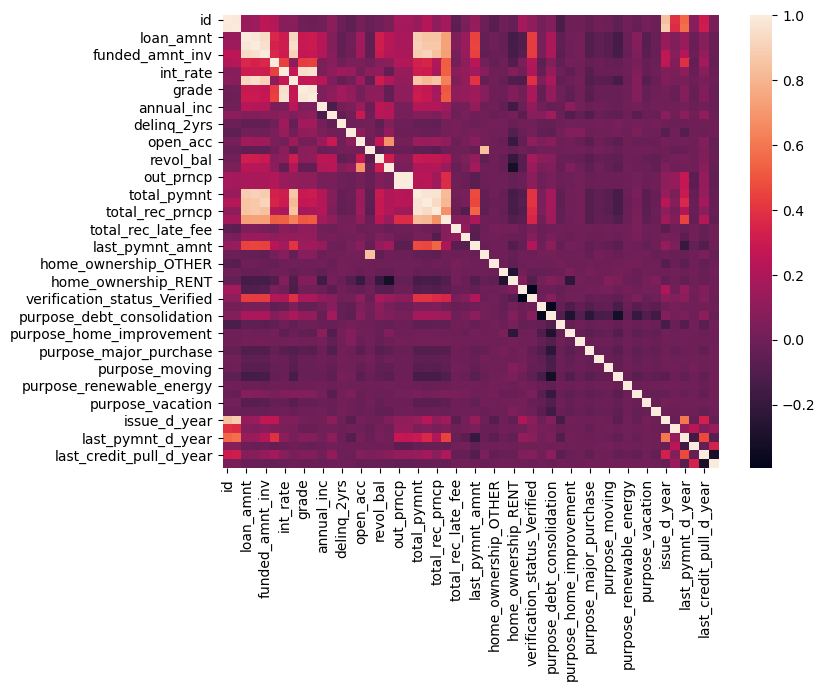

In [30]:
# Checking correlation using heatmap
plt.figure(figsize=(8,6),dpi=100)
sns.heatmap(train.corr())
plt.show()

In [31]:
train.shape

(24954, 60)

In [32]:
test.shape

(14690, 61)

In [33]:
#dropping some more unnecessary features
train.drop(['issue_d','last_pymnt_d','last_credit_pull_d','earliest_cr_line','url'],axis=1,inplace=True)
test.drop(['home_ownership_NONE','issue_d','last_pymnt_d','last_credit_pull_d',
           'earliest_cr_line','url'],axis=1,inplace=True)

In [34]:
# Remove % symbol from revol_util column
train['revol_util'] = train['revol_util'].str.rstrip('%')
train['revol_util'] = train['revol_util'].astype(float)

test['revol_util'] = test['revol_util'].str.rstrip('%')
test['revol_util'] = test['revol_util'].astype(float)

In [35]:
#checking for remaining null values
train.isnull().sum()

id                                       0
member_id                                0
loan_amnt                                0
funded_amnt                              0
funded_amnt_inv                          0
term                                     0
int_rate                                 0
installment                              0
grade                                    0
sub_grade                                0
emp_length                              41
annual_inc                               0
loan_status                              0
dti                                      0
delinq_2yrs                              0
inq_last_6mths                           0
open_acc                                 0
pub_rec                                  0
revol_bal                                0
revol_util                              26
total_acc                                0
out_prncp                                0
out_prncp_inv                            0
total_pymnt

In [36]:
train['emp_length']

0        10+ years
1           1 year
2          4 years
3        10+ years
4          5 years
           ...    
24994      7 years
24995      7 years
24996    10+ years
24997    10+ years
24998     < 1 year
Name: emp_length, Length: 24954, dtype: object

In [37]:
#converting the emp_length column to have only integers
train['emp_length'].fillna('0',inplace=True)
train['emp_length']=train['emp_length'].str.extract('(\d+)')
train['emp_length'] = train['emp_length'].astype(int)

test['emp_length'].fillna('0',inplace=True)
test['emp_length']=test['emp_length'].str.extract('(\d+)')
test['emp_length'] = test['emp_length'].astype(int)

In [38]:
#replacing the nan values with the mean of the particular column
train['revol_util'] = train['revol_util'].fillna(train['revol_util'].mean())
test['revol_util'] = test['revol_util'].fillna(test['revol_util'].mean())

In [39]:
#dropping some more unnecessary features on the way
train.drop(['total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
        'total_rec_late_fee','recoveries','pub_rec_bankruptcies'],inplace=True,axis=1)

test.drop(['total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
        'total_rec_late_fee','recoveries','pub_rec_bankruptcies'],inplace=True,axis=1)

In [40]:
#loan_status in comparison
(train['loan_status'].value_counts()*100)/len(train)

Fully Paid     83.461569
Charged Off    13.741284
Current         2.797147
Name: loan_status, dtype: float64

In [41]:
# number of 'current' loan_status which are not relevent to us for this problem
(train['loan_status'] == 'Current').sum()

698

In [42]:
#dropping the 'current' loan_status
train = train.drop(train[train['loan_status'] == 'Current'].index)

In [43]:
train['loan_status'] = train['loan_status'].map({'Fully Paid':'+1','Charged Off':'-1'})

In [44]:
#loan_status in comparison
(train['loan_status'].value_counts()*100)/len(train)

+1    85.863292
-1    14.136708
Name: loan_status, dtype: float64

In [45]:
#dropping the 'current' loan_status
test = test.drop(test[test['loan_status'] == 'Current'].index)
test['loan_status'] = test['loan_status'].map({'Fully Paid':'+1','Charged Off':'-1'})
#loan_status in comparison
(test['loan_status'].value_counts()*100)/len(test)

+1    85.078608
-1    14.921392
Name: loan_status, dtype: float64

In [46]:
#features with only 0's 
train.drop(['out_prncp','out_prncp_inv'],axis=1,inplace=True)
test.drop(['out_prncp','out_prncp_inv'],axis=1,inplace=True)

In [47]:
train.shape

(24256, 46)

In [48]:
test.shape

(14248, 46)

In [49]:
# At the end we successfully shrinked our data down to 46 features for both train and test dataset

# 5. (b) Training the model and making predictions

In [50]:
#making the train and test splits
X_train = train.drop('loan_status', axis=1)
X_test = test.drop('loan_status', axis=1)
y_train = train['loan_status']
y_test = test['loan_status']

### Reporting best accuracy, optimal hyperparameters, precision and recall of the models

In [51]:
#Applied a grid search crossvalidation to find the optimal parameters to get the best acccuracy

In [52]:
#Please don't try to run this cell as it takes hours to complete


# from sklearn.model_selection import GridSearchCV
# gradient_model = GradientBoostingClassifier()

# n_estimators = [10,50,100,200,300]
# max_features = [5,6,7,8,9,10]
# max_depth = [None,5,10,15,20]

# param_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth}
# grid_model = GridSearchCV(estimator = gradient_model, param_grid = param_grid, verbose = 2)
# grid_model.fit(X_train,y_train)


### Model 1 (n_estimators=50,max_features=5,max_depth=5)

In [53]:
start_time = time.time()

model1 = GradientBoostingClassifier(n_estimators=50,max_features=5,max_depth=5)
model1.fit(X_train, y_train)
pred = model1.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_test, pred)*100)

end_time=time.time()
print("Time Taken: {} secs".format(round(end_time-start_time,3)))
print('\n')
# Checking classification_report
print('Classification Report')
print('\n')
print(classification_report(y_test, pred))

Accuracy Score:  92.96041549691185
Time Taken: 1.566 secs


Classification Report


              precision    recall  f1-score   support

          +1       0.93      0.99      0.96     12122
          -1       0.93      0.57      0.71      2126

    accuracy                           0.93     14248
   macro avg       0.93      0.78      0.83     14248
weighted avg       0.93      0.93      0.92     14248



### Model 2 (n_estimators=100,max_features=5,max_depth=5)

In [54]:
start_time = time.time()

model2 = GradientBoostingClassifier(n_estimators=100,max_features=5,max_depth=5)
model2.fit(X_train, y_train)
pred = model2.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_test, pred)*100)

end_time=time.time()
print("Time Taken: {} secs".format(round(end_time-start_time,3)))
print('\n')
# Checking classification_report
print('Classification Report')
print('\n')
print(classification_report(y_test, pred))

Accuracy Score:  95.12914093206064
Time Taken: 2.937 secs


Classification Report


              precision    recall  f1-score   support

          +1       0.96      0.99      0.97     12122
          -1       0.92      0.74      0.82      2126

    accuracy                           0.95     14248
   macro avg       0.94      0.86      0.90     14248
weighted avg       0.95      0.95      0.95     14248



### Model 3 (n_estimators=150,max_features=5,max_depth=5)

In [55]:
start_time = time.time()

model3 = GradientBoostingClassifier(n_estimators=150,max_features=5,max_depth=5)
model3.fit(X_train, y_train)
pred = model3.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_test, pred)*100)

end_time=time.time()
print("Time Taken: {} secs".format(round(end_time-start_time,3)))
print('\n')
# Checking classification_report
print('Classification Report')
print('\n')
print(classification_report(y_test, pred))

Accuracy Score:  95.66956765861875
Time Taken: 4.492 secs


Classification Report


              precision    recall  f1-score   support

          +1       0.96      0.99      0.97     12122
          -1       0.91      0.79      0.85      2126

    accuracy                           0.96     14248
   macro avg       0.93      0.89      0.91     14248
weighted avg       0.96      0.96      0.96     14248



### Final Model (n_estimators=500,max_features=8,max_depth=10)

#### n_estimators = 500, max_features = 8, max_depth = 10 leads to the best accuracy

In [56]:
start_time = time.time()

final_model = GradientBoostingClassifier(n_estimators=500,max_features=8,max_depth=10)
final_model.fit(X_train, y_train)
pred = final_model.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_test, pred)*100)

end_time=time.time()
print("Time Taken: {} secs".format(round(end_time-start_time,3)))

Accuracy Score:  96.80656934306569
Time Taken: 54.273 secs


#### Best test accuracy achieved is ≈ 97%

In [57]:
# Checking classification_report
print('Classification Report')
print('\n')
print(classification_report(y_test, pred))

Classification Report


              precision    recall  f1-score   support

          +1       0.97      0.99      0.98     12122
          -1       0.93      0.85      0.89      2126

    accuracy                           0.97     14248
   macro avg       0.95      0.92      0.93     14248
weighted avg       0.97      0.97      0.97     14248



In [58]:
#The precision and recall for the model is listed above in the classification report

In [59]:
#Checking for the Important features having atleast 1% corr with our class label as per our model

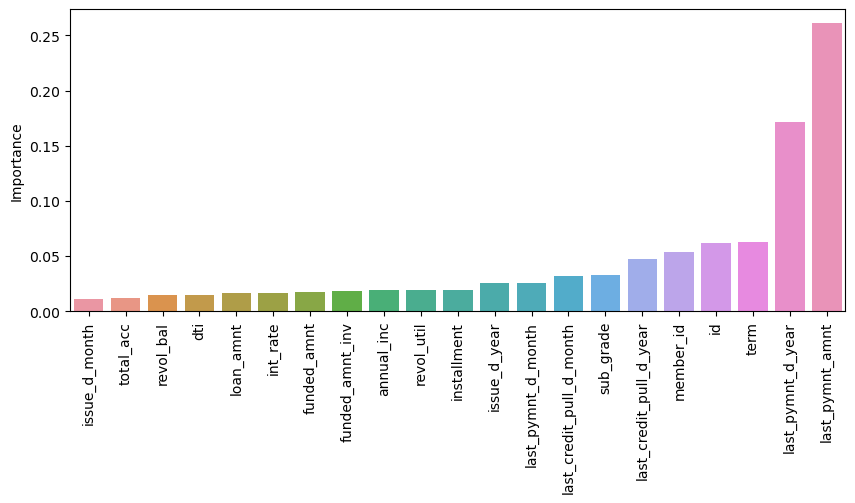

In [60]:
feat_imp = pd.DataFrame(index = X_train.columns, data = final_model.feature_importances_, columns = ['Importance'])
feat_imp = feat_imp[feat_imp['Importance'] > 0.01]

plt.figure(figsize=(10,4),dpi=100)
sns.barplot(data = feat_imp.sort_values('Importance'), x = feat_imp.sort_values('Importance').index, y = 'Importance')
plt.xticks(rotation=90)
plt.show()

### Effect of increasing the number of trees on the test error

In [61]:
start_time = time.time()
test_error=[]
n_estimators = [50,100,150,200,250,300,400,500]

for n in n_estimators:
    gradient_model = GradientBoostingClassifier(n_estimators=n)
    gradient_model.fit(X_train,y_train)
    pred = gradient_model.predict(X_test)
    test_error.append(1-accuracy_score(y_test,pred))

end_time=time.time()
print("Time Taken: {}".format(round(end_time-start_time,3)))

Time Taken: 222.68


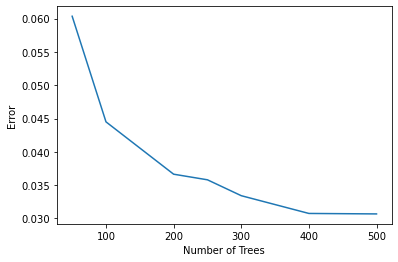

In [62]:
plt.plot(n_estimators,test_error)
plt.xlabel('Number of Trees')
plt.ylabel('Error')
plt.show()

### Comparing GradientBoosting Performance against a simple decision tree

In [63]:
#simple decision tree built using information gain 
dt_model = DecisionTreeClassifier(criterion = 'entropy')
dt_model.fit(X_train,y_train)
pred = dt_model.predict(X_test)
accuracy_score(pred,y_test)

0.9390791690061763

#### Test accuracy achieved using decision tree is ≈ 94%

In [64]:
# Checking classification_report
print('Classification Report')
print('\n')
print(classification_report(y_test, pred))

Classification Report


              precision    recall  f1-score   support

          +1       0.96      0.96      0.96     12122
          -1       0.80      0.79      0.79      2126

    accuracy                           0.94     14248
   macro avg       0.88      0.88      0.88     14248
weighted avg       0.94      0.94      0.94     14248



In [65]:
#The precision and recall of the decision tree model is listed above in the classification report